## Improting needed packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## Load and inspect the data

In [2]:
df = pd.read_csv('FuelConsumption.csv')

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Understanding the data

- MODELYEAR e.g. 2014
- MAKE e.g. Acura
- MODEL e.g. ILX
- VEHICLE CLASS e.g. SUV
- ENGINE SIZE e.g. 4.7
- CYLINDERS e.g 6
- TRANSMISSION e.g. A6
- FUELTYPE e.g. z
- FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
- FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
- FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
- CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

Plot the features against our target variable i.e CO2EMISSION

In [4]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [6]:
data_not_num = df.select_dtypes(['object'])

In [7]:
data_not_num_processed = pd.get_dummies(data_not_num)

In [8]:
data_not_num_processed.head()

,MAKE_ACURA,MAKE_ASTON MARTIN,MAKE_AUDI,MAKE_BENTLEY,MAKE_BMW,MAKE_BUICK,MAKE_CADILLAC,MAKE_CHEVROLET,MAKE_CHRYSLER,MAKE_DODGE,...,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
from sklearn.preprocessing import OneHotEncoder

oe = OneHotEncoder()
oe.fit(data_not_num)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [10]:
oe.categories_

[array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
        'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD',
        'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
        'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
        'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
        'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
        'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object),
 array(['1500 (MDS)', '1500 4X4 (MDS)', '1500 4X4 DIESEL', '1500 4X4 FFV',
        '1500 DIESEL', '1500 FFV', '1500 HFE', '200 CONVERTIBLE',
        '200 CONVERTIBLE FFV', '200 SEDAN', '200 SEDAN FFV', '300',
        '300 (MDS)', '300 AWD', '300 AWD (MDS)', '300 AWD FFV', '300 FFV',
        '300 SRT (MDS)', '320i', '320i xDRIVE', '328d xDRIVE',
        '328d xDRIVE TOURING', '328i', '328i xDRIVE',
        '328i xDRIVE GRAN TURISMO', '328i xDRIVE TOURING', '335i',
        '335i xDRIVE', '335i xDRIVE GRAN TURISMO', '37

In [12]:
data_featured = oe.transform(data_not_num)

In [24]:
data_featured.shape

(1067, 744)

In [14]:
type(data_featured)

scipy.sparse.csr.csr_matrix

In [15]:
data_pre = oe.inverse_transform(data_featured)

In [16]:
type(data_pre)

numpy.ndarray

In [17]:
data_pre

array([['ACURA', 'ILX', 'COMPACT', 'AS5', 'Z'],
       ['ACURA', 'ILX', 'COMPACT', 'M6', 'Z'],
       ['ACURA', 'ILX HYBRID', 'COMPACT', 'AV7', 'Z'],
       ...,
       ['VOLVO', 'XC70 AWD', 'SUV - SMALL', 'AS6', 'X'],
       ['VOLVO', 'XC70 AWD', 'SUV - SMALL', 'AS6', 'X'],
       ['VOLVO', 'XC90 AWD', 'SUV - STANDARD', 'AS6', 'X']], dtype=object)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [20]:
df_clean = df.drop([key for key in df.columns.to_list() if df[key].dtype == 'object'], axis = 1)

In [21]:
df_clean.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244


In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for key in data_not_num.columns.to_list():
    data_not_num[key] = le.fit_transform(data_not_num[key])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [27]:
data_not_num.head()

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
0,0,329,0,10,3
1,0,329,0,20,3
2,0,330,0,17,3
3,0,389,11,11,3
4,0,483,11,11,3


In [33]:
final_data = pd.concat([df_clean, data_not_num], sort=False, axis=1)

In [34]:
final_data.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
0,2014,2.0,4,9.9,6.7,8.5,33,196,0,329,0,10,3
1,2014,2.4,4,11.2,7.7,9.6,29,221,0,329,0,20,3
2,2014,1.5,4,6.0,5.8,5.9,48,136,0,330,0,17,3
3,2014,3.5,6,12.7,9.1,11.1,25,255,0,389,11,11,3
4,2014,3.5,6,12.1,8.7,10.6,27,244,0,483,11,11,3


In [38]:
features = final_data.drop(['CO2EMISSIONS'], axis=1)
target = final_data['CO2EMISSIONS']

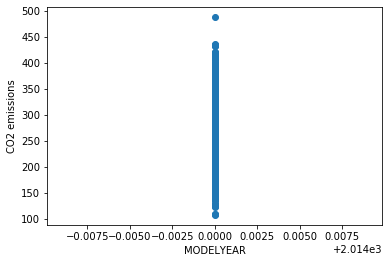

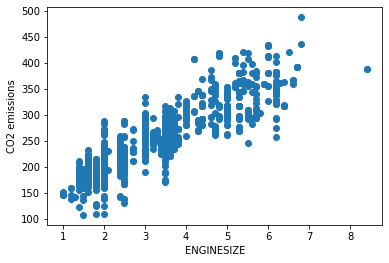

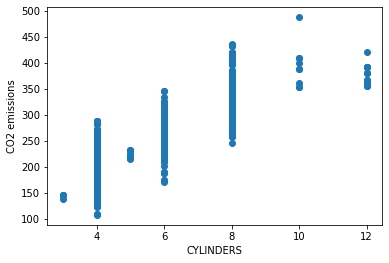

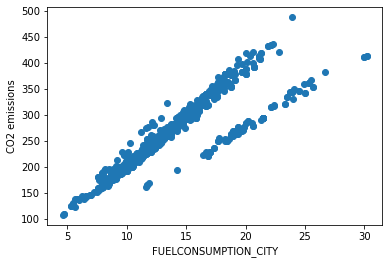

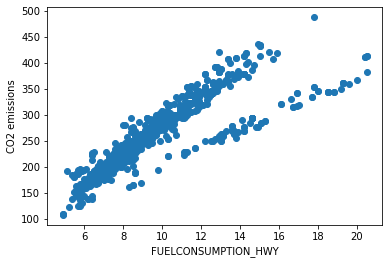

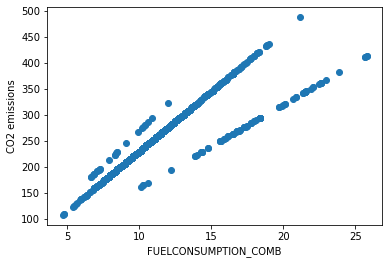

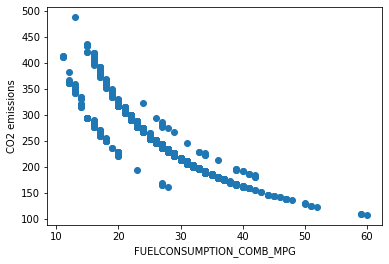

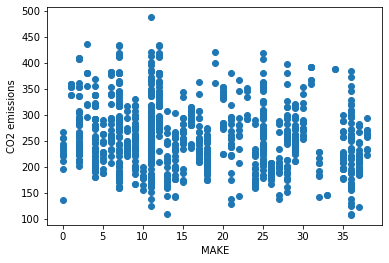

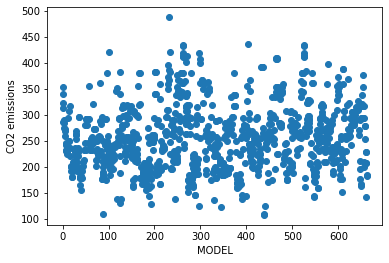

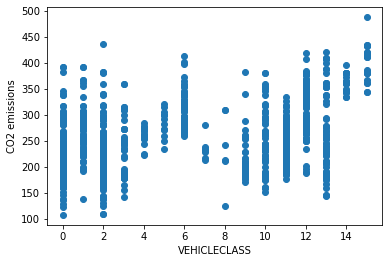

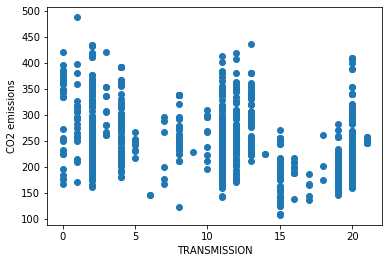

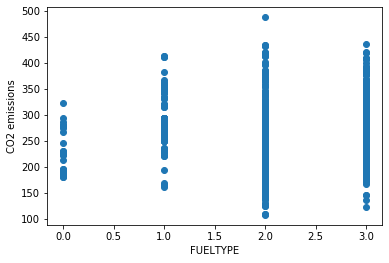

In [41]:
for key in features.columns.to_list():
    plt.figure()
    plt.scatter(features[key], target)
    plt.xlabel(key)
    plt.ylabel('CO2 emissions')
    plt.show()

In [42]:
# mask method for splitling train-test data
mask = np.random.rand(len(final_data)) < 0.8 #80% train, 20% test
train = final_data[mask]
test = final_data[~mask]

In [43]:
train.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
0,2014,2.0,4,9.9,6.7,8.5,33,196,0,329,0,10,3
1,2014,2.4,4,11.2,7.7,9.6,29,221,0,329,0,20,3
2,2014,1.5,4,6.0,5.8,5.9,48,136,0,330,0,17,3
4,2014,3.5,6,12.1,8.7,10.6,27,244,0,483,11,11,3
5,2014,3.5,6,11.9,7.7,10.0,28,230,0,490,2,11,3


In [44]:
test.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
3,2014,3.5,6,12.7,9.1,11.1,25,255,0,389,11,11,3
6,2014,3.5,6,11.8,8.1,10.1,28,232,0,578,2,11,3
25,2014,2.0,4,12.0,8.1,10.2,28,235,2,76,2,13,3
32,2014,3.0,6,10.0,6.4,8.4,34,227,2,81,2,13,0
36,2014,3.0,6,10.1,6.5,8.5,33,230,2,83,1,13,0


In [50]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
x_train = np.asarray(train.drop(['CO2EMISSIONS'], axis=1))
y_train = np.asarray(train['CO2EMISSIONS'])

In [51]:
lr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
x_test = np.asarray(test.drop(['CO2EMISSIONS'], axis=1))
y_pred = lr.predict(x_test)

In [74]:
from sklearn.metrics import mean_squared_log_error, roc_curve

y_test = np.asarray(test['CO2EMISSIONS'])
print(mean_squared_log_error(y_test, y_pred))

0.0047132363008693095


In [69]:
theta = lr.coef_
theta = theta.reshape(-1, 1)
print(x_test.shape, theta.shape, y_test.shape)

(211, 12) (12, 1) (211,)


In [70]:
y_predicted = np.dot(x_test, theta)

In [72]:
y_predicted.shape

(211, 1)

In [75]:
y_test = y_test.reshape(-1, 1)
y_test.shape

(211, 1)

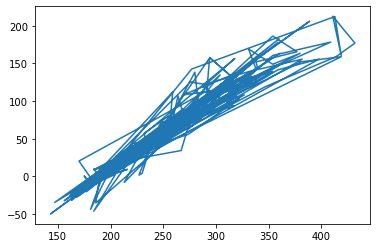

In [76]:
plt.plot(y_test, y_predicted)